In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import ufunc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
train_data = pd.read_csv(r'dataset/train.csv')

# Inputs and Output
features = ['OverallQual', 'OverallCond', 'YearBuilt', 'MSZoning', 'LotArea', 'Neighborhood', ]
target = 'SalePrice'

X = train_data[features]
y = train_data[target]

AttributeError: module 'numpy.random' has no attribute 'mtrand'

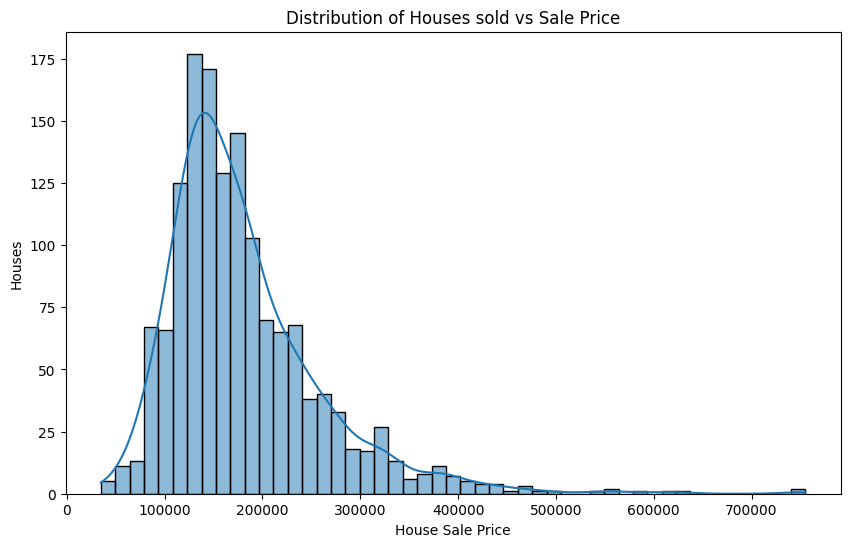

In [2]:
plt.figure(figsize=(10, 6))

sns.histplot(y, kde=True)

plt.title('Distribution of Houses sold vs Sale Price')
plt.xlabel('House Sale Price')
plt.ylabel('Houses')
plt.show()


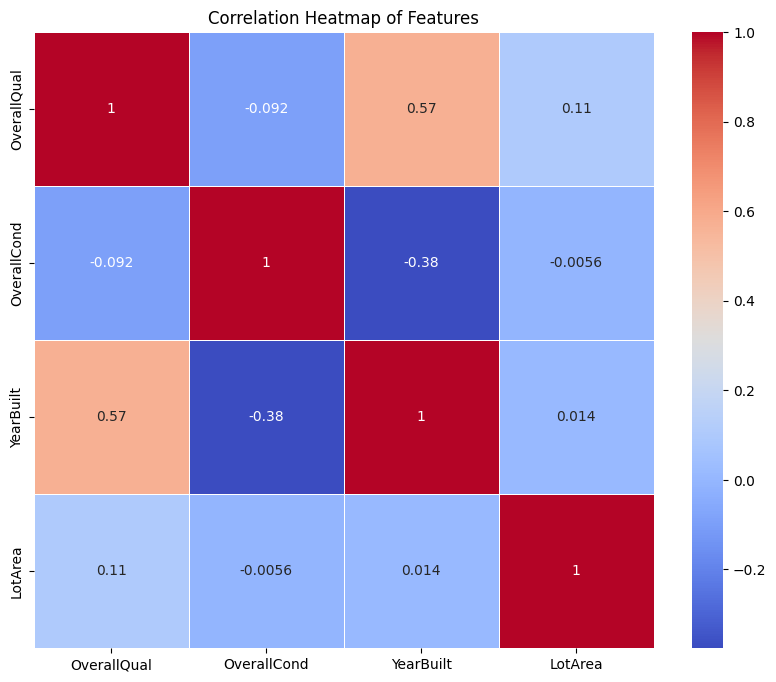

In [3]:
# Correlation Heatmap of numerical features
plt.figure(figsize=(10, 8))
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [4]:
def process_zoning(df, zoning_col):
    # MSZoning: Identifies the general zoning classification of the sale.
            
    #   A	Agriculture
    #   C	Commercial
    #   FV	Floating Village Residential
    #   I	Industrial
    #   RH	Residential High Density
    #   RL	Residential Low Density
    #   RP	Residential Low Density Park 
    #   RM	Residential Medium Density

    zoning_mapping = {
        'A': 1,
        'C': 2,
        'FV': 3,
        'I': 4,
        'RH': 5,
        'RL': 6,
        'RP': 7,
        'RM': 8
    }
    
    return df[zoning_col].map(zoning_mapping)

X.loc[:, "MSZoning"] = process_zoning(X, "MSZoning")


In [5]:
def process_neighborhood(df, neighborhood_col):
    # Neighborhood: Physical locations within Ames city limits

    #    Blmngtn	Bloomington Heights
    #    Blueste	Bluestem
    #    BrDale	Briardale
    #    BrkSide	Brookside
    #    ClearCr	Clear Creek
    #    CollgCr	College Creek
    #    Crawfor	Crawford
    #    Edwards	Edwards
    #    Gilbert	Gilbert
    #    IDOTRR	Iowa DOT and Rail Road
    #    MeadowV	Meadow Village
    #    Mitchel	Mitchell
    #    Names	North Ames
    #    NoRidge	Northridge
    #    NPkVill	Northpark Villa
    #    NridgHt	Northridge Heights
    #    NWAmes	Northwest Ames
    #    OldTown	Old Town
    #    SWISU	South & West of Iowa State University
    #    Sawyer	Sawyer
    #    SawyerW	Sawyer West
    #    Somerst	Somerset
    #    StoneBr	Stone Brook
    #    Timber	Timberland
    #    Veenker	Veenker
			
    neighborhood_mapping = {
        'Blmngtn': 1,
        'Blueste': 2,
        'BrDale': 3,
        'BrkSide': 4,
        'ClearCr': 5,
        'CollgCr': 6,
        'Crawfor': 7,
        'Edwards': 8,
        'Gilbert': 9,
        'IDOTRR': 10,
        'MeadowV': 11,
        'Mitchel': 12,
        'Names': 13,
        'NoRidge': 14,
        'NPkVill': 15,
        'NridgHt': 16,
        'NWAmes': 17,
        'OldTown': 18,
        'SWISU': 19,
        'Sawyer': 20,
        'SawyerW': 21,
        'Somerst': 22,
        'StoneBr': 23,
        'Timber': 24,
        'Veenker': 25
    }
    
    return df[neighborhood_col].map(neighborhood_mapping)

X.loc[:, "Neighborhood"] = process_neighborhood(X, "Neighborhood")


In [6]:
X = X.dropna(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random.seed())

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R): {r2:.2f}")

Mean Squared Error (MSE): 1940190685.73
Mean Absolute Error (MAE): 31469.00
R-squared (R): 0.72


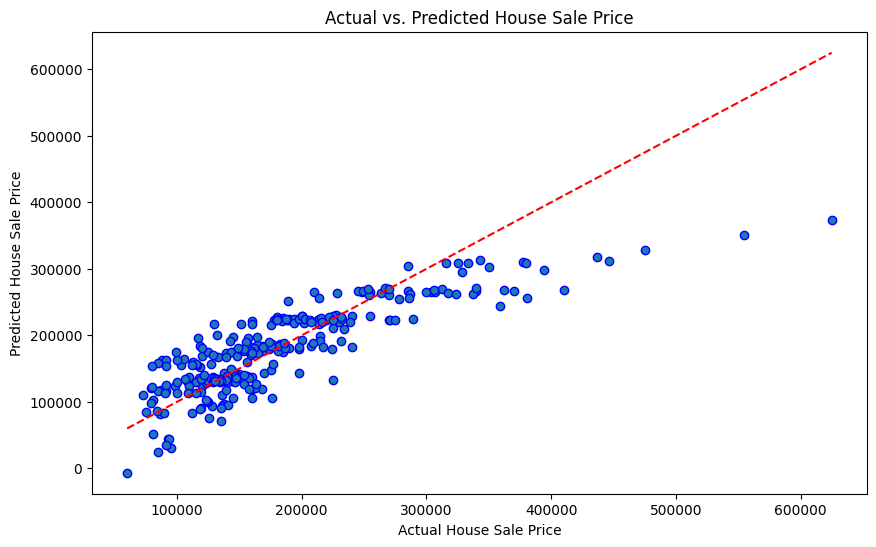

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, edgecolors='b')
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    'r--' 
    )

plt.xlabel('Actual House Sale Price')
plt.ylabel('Predicted House Sale Price')

plt.title('Actual vs. Predicted House Sale Price')

plt.show()